# Ruta de archivos

En esta ruta se guardarán los grafos generados


In [1]:
path_files = '/content/drive/MyDrive/TUIA/Procesamiento lenguaje Natural/TP2/Graphs/'

# Exportación a XML

In [2]:
!pip install rdflib

# Características según los tipos de uva

Con la tabla extraída del manual oficial, armo un grafo que relaciona las características y necesidades de cada tipo de uva.

In [3]:
import networkx as nx

# Crear un grafo dirigido
G = nx.DiGraph()

# Datos de las variedades de uva
# Variedad, Color/es, Valor Tinto, Valor Blanco, Total de cartas, Prerrequisito/s

variedades = [
    ("Sangiovese",          ["Tinto"],            1, 0, 4, ["Ninguno"]),
    ("Malvasia",            ["Blanco"],           0, 1, 4, ["Ninguno"]),
    ("Pinot",               ["Tinto", "Blanco"],  1, 1, 6, ["Emparrado"]),
    ("Syrah",               ["Tinto"],            2, 0, 5, ["Emparrado"]),
    ("Trebbiano",           ["Blanco"],           0, 2, 5, ["Emparrado"]),
    ("Merlot",              ["Tinto"],            3, 0, 5, ["Riego"]),
    ("Sauvignon_Blanc",     ["Blanco"],           0, 3, 5, ["Riego"]),
    ("Cabernet_Sauvignon",  ["Tinto"],            4, 0, 4, ["Emparrado", "Riego"]),
    ("Chardonnay",          ["Blanco"],           0, 4, 4, ["Emparrado", "Riego"])]

In [4]:
# Agregar los nodos y las aristas al grafo
for uva, colores, valor_tinto, valor_blanco, total_cartas, prerequisitos in variedades:
    G.add_node(uva, valor_tinto=valor_tinto, valor_blanco=valor_blanco, total_cartas=total_cartas)

    # Relaciones con la variedad de uva para "tipo" y "valor"
    for color in colores:
      if color == "Tinto":
        G.add_edge(uva, color, relation="tipo", value=valor_tinto)
      if color == "Blanco":
        G.add_edge(uva, color, relation="tipo", value=valor_blanco)

    # Relación de los prerrequisitos
    for prerequisito in prerequisitos:
        G.add_edge(uva, prerequisito, relation="necesita", value='')

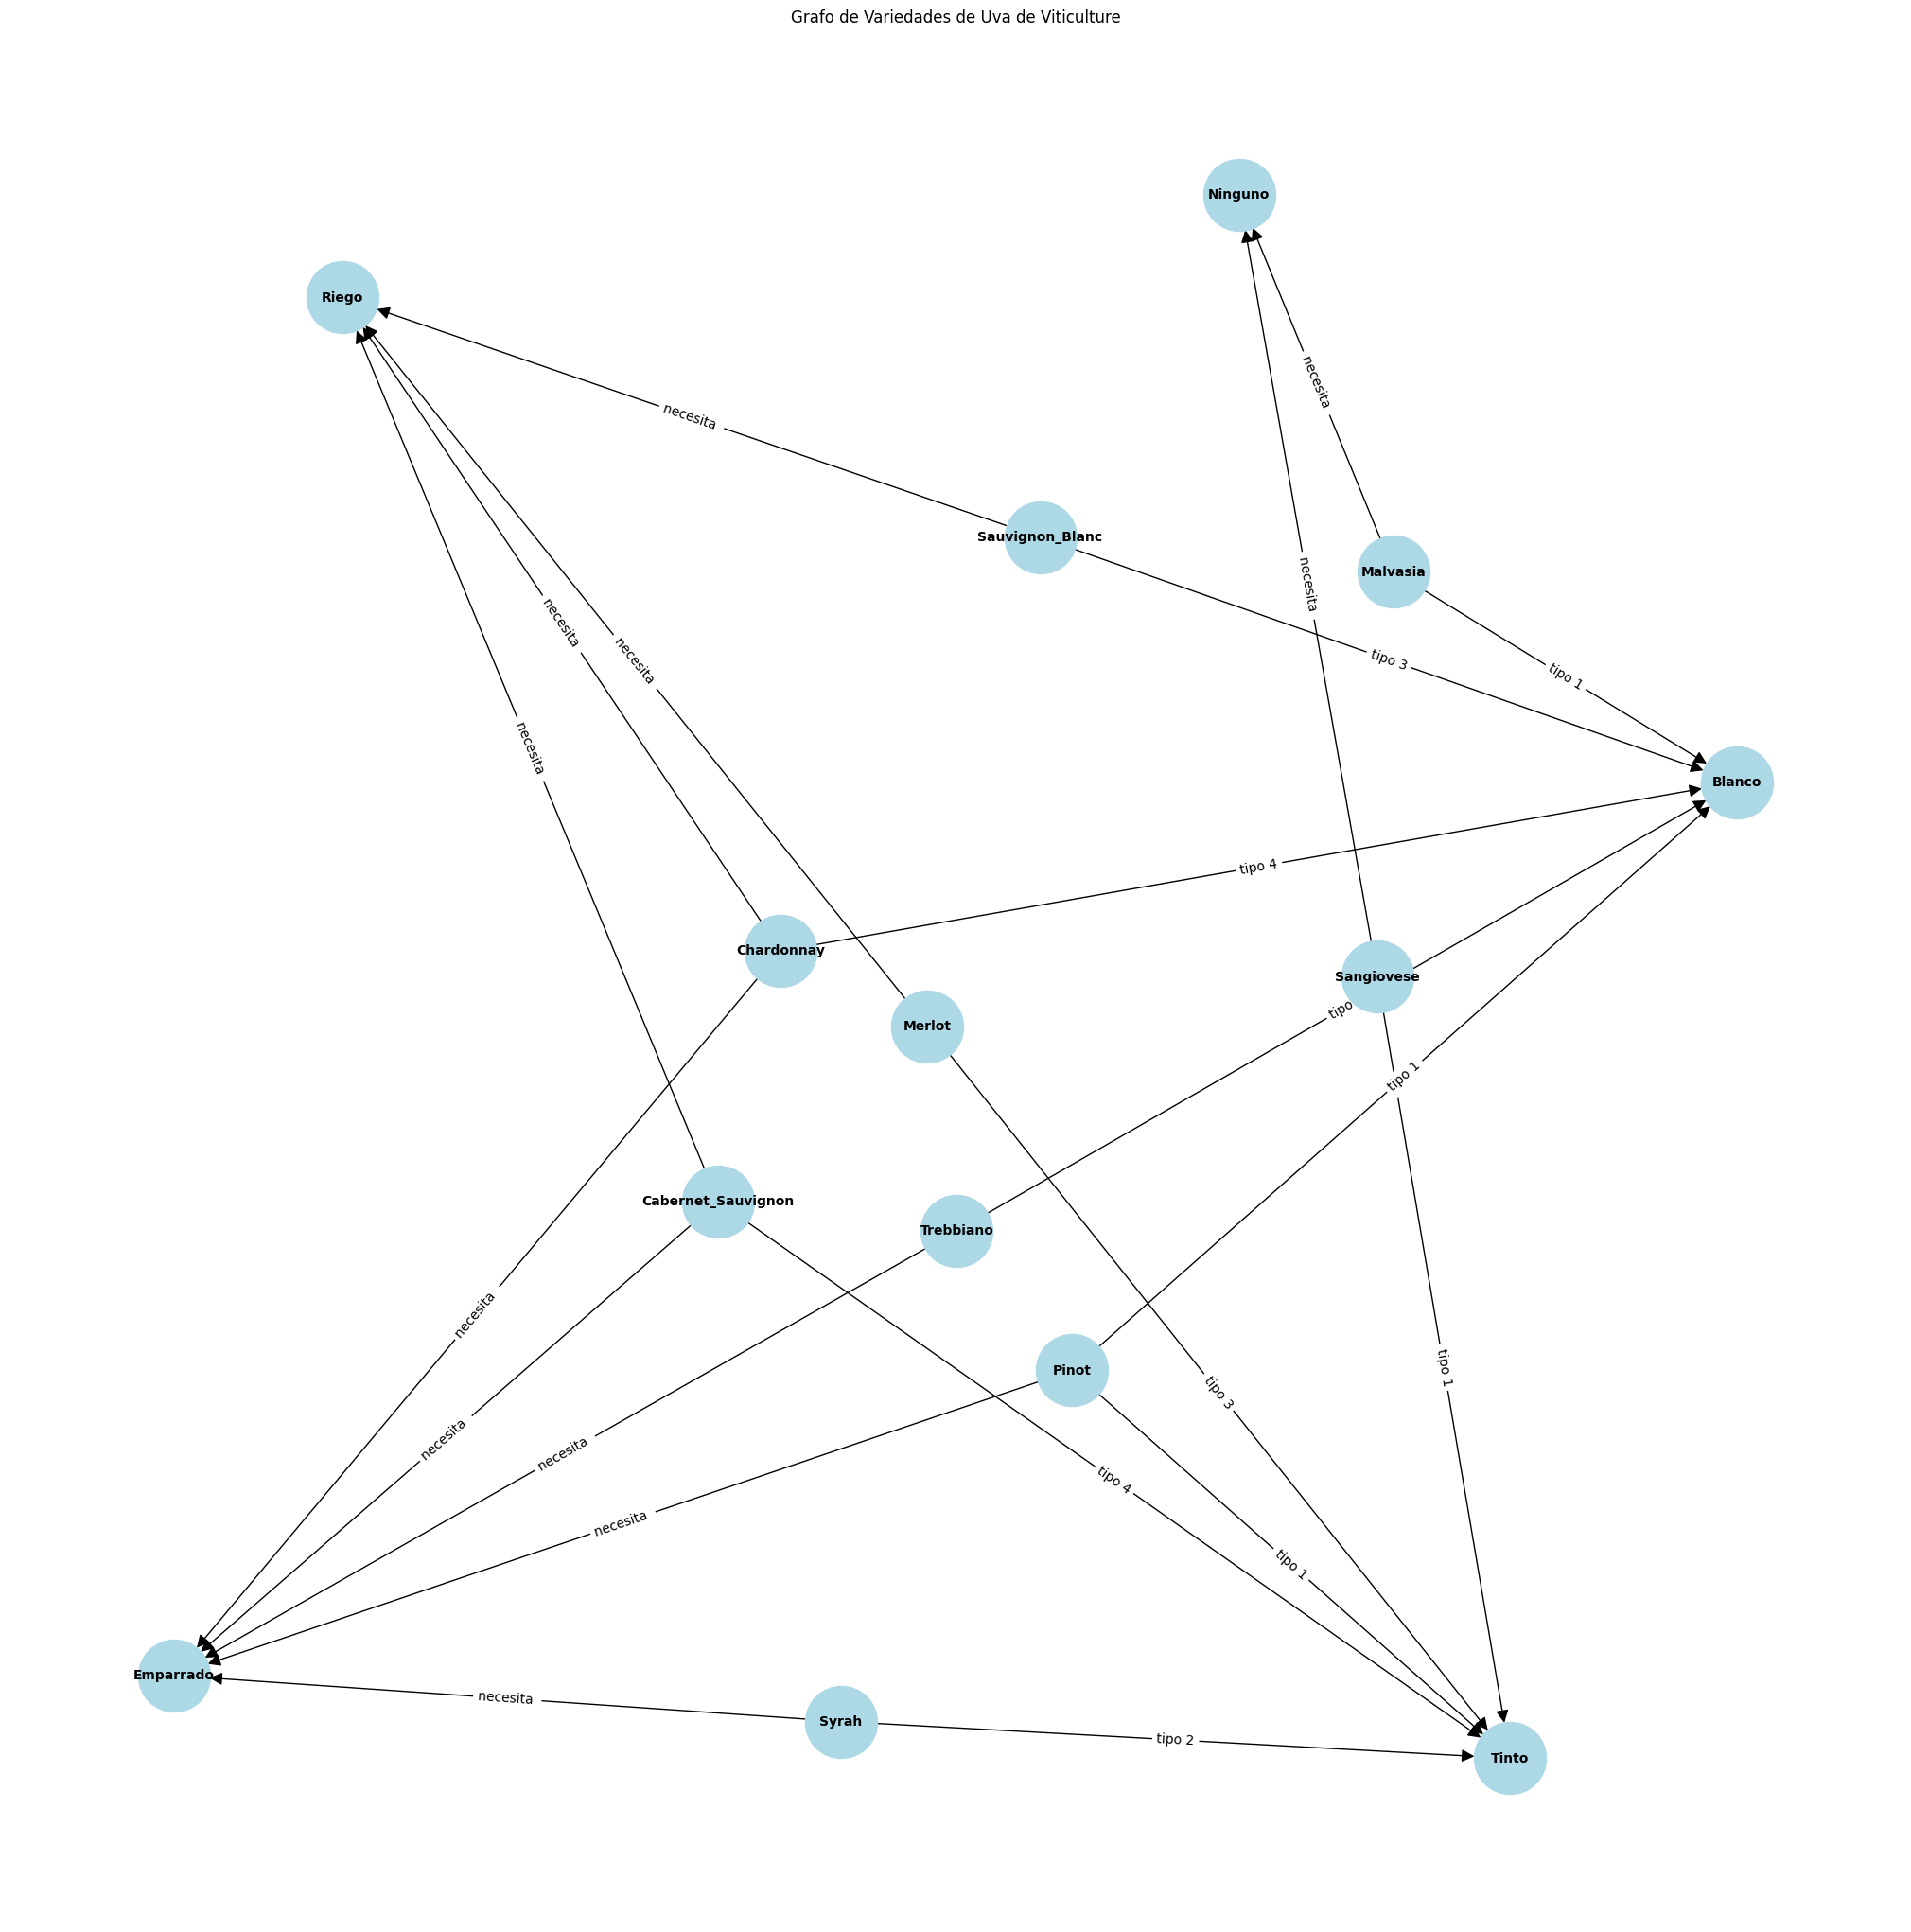

In [5]:
import matplotlib.pyplot as plt

# Visualización del grafo
plt.figure(figsize=(20, 20))

# Dibujar el grafo
pos = nx.spring_layout(G, seed=112)  # Para obtener una disposición más agradable
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)

# Dibujar las etiquetas de las relaciones
edge_labels = {}
for u, v, data in G.edges(data=True):
    if 'relation' in data and 'value' in data:
        edge_labels[(u, v)] = f"{data['relation']} {data['value']}"

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Mostrar el grafo
plt.title("Grafo de Variedades de Uva de Viticulture")
plt.axis("off")
plt.show()

In [6]:
import json

# Convierto el grafo a un diccionario para guardarlo
grafo_dict = nx.node_link_data(G)

# Guardar el grafo en un archivo JSON
with open(path_files+'Uvas.json', 'w') as f:
    json.dump(grafo_dict, f, indent=4)


/usr/local/lib/python3.10/dist-packages/networkx/readwrite/json_graph/node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


In [7]:
from rdflib import Graph, Literal, RDF, Namespace, URIRef
# Guardar el grafo en un archivo RDF
# Crear un grafo RDF
g = Graph()

# Definir un espacio de nombres para tus recursos
n = Namespace("http://example.org/")

# Añadir nodos y relaciones al grafo RDF
for edge in G.edges():
    subject_name, object_name = edge
    relation_name = edge_labels[edge]

    # Reemplazo espacios con guiones bajos en el nombre de la relación
    relation_name = relation_name.replace(" ", "_")

    subject = URIRef(n + subject_name)
    predicate = URIRef(n + relation_name)
    obj = URIRef(n + object_name)

    g.add((subject, predicate, obj))

# Serializar y exportar el grafo a RDF/XML
rdf_output = g.serialize(format='xml')
print(rdf_output)

# Guardar el RDF en un archivo
with open(path_files+"Uvas.rdf", "w") as file:
    file.write(rdf_output)
print("Grafo generado y guardado en 'Uvas.rdf'.")

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:ns1="http://example.org/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://example.org/Pinot">
    <ns1:tipo_1 rdf:resource="http://example.org/Tinto"/>
    <ns1:tipo_1 rdf:resource="http://example.org/Blanco"/>
    <ns1:necesita_ rdf:resource="http://example.org/Emparrado"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/Trebbiano">
    <ns1:tipo_2 rdf:resource="http://example.org/Blanco"/>
    <ns1:necesita_ rdf:resource="http://example.org/Emparrado"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/Sangiovese">
    <ns1:tipo_1 rdf:resource="http://example.org/Tinto"/>
    <ns1:necesita_ rdf:resource="http://example.org/Ninguno"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/Sauvignon_Blanc">
    <ns1:tipo_3 rdf:resource="http://example.org/Blanco"/>
    <ns1:necesita_ rdf:resource="http://example.org/Riego"/>

# Acciones

Tambien a partir del manual, genero un grafo con las posibles acciones en el juego, la época del año en la que se puede realizar y los costos/beneficios de cada una

In [8]:
import networkx as nx

# Crear un grafo dirigido
G = nx.DiGraph()

# Datos de las variedades de uva
# Acción, Temporada, Beneficio, Costo

acciones = [
    ("Tabla de despertar",["Primavera"],0,0),
    ("Colocar trabajador",["Primavera"],0,0),
    ("Colocar trabajador grande",["Primavera"],0,0),
    ("Colocar trabajador en carreta",["Verano", "Invierno"],1,0),
    ("Desarraigar",["Verano"],0,0),
    ("Jugar carta de visitante de verano",["Verano"],0,0),
    ("Robar carta de vid",["Verano"],0,0),
    ("Hacer un tour por el viñedo",["Verano"],2,0),
    ("Plantar una vid",["Verano"],0,0),
    ("Vender uva valor 1-2-3",["Verano"],1,0),
    ("Vender uva valor 4-5-6",["Verano"],2,0),
    ("Vender uva valor 7-8-9",["Verano"],3,0),
    ("Vender terreno",["Verano"],0,0),
    ("Comprar terreno",["Verano"],0,0),
    ("Construir estructura Sala de catas",["Verano"],0,6),
    ("Construir estructura Bodega mediana",["Verano"],0,4),
    ("Construir estructura Bodega grande",["Verano"],0,6),
    ("Construir estructura Emparrado",["Verano"],0,2),
    ("Construir estructura Molino",["Verano"],0,5),
    ("Construir estructura Riego",["Verano"],0,3),
    ("Construir estructura Yugo",["Verano"],0,2),
    ("Construir estructura Casa de campo",["Verano"],0,4),
    ("Tomar carta de visitante",["Otoño"],0,0),
    ("Robar carta de pedido de vino",["Invierno"],0,0),
    ("Jugar carta de visitante de invierno",["Invierno"],0,0),
    ("Cosechar un terreno",["Invierno"],0,0),
    ("Formar un nuevo trabajador",["Invierno"],0,4),
    ("Completar un pedido de vino",["Invierno"],0,0),
    ("Produce un vino",["Invierno"],0,0),
    ("Envejecer vino",["Fin de año"],0,0),
    ("Retirar trabajadores",["Fin de año"],0,0),
    ("Cobrar pagos residuales",["Fin de año"],0,0),
    ("Quedarse con 7 cartas",["Fin de año"],0,0),
    ("Rotar primer jugador",["Fin de año"],0,0)]

In [9]:
# Agregar los nodos y las aristas al grafo
for accion, temporadas, beneficio, costo in acciones:
    accion = accion.replace(" ", "_")
    G.add_node(accion)

    # Relaciones con la variedad de uva para "tipo" y "valor"
    for temporada in temporadas:
      G.add_edge(accion, temporada, relation="es_acción_de", value='')

    if beneficio > 0:
      G.add_edge(accion, beneficio, relation="gana", value=beneficio)

    if costo > 0:
      G.add_edge(accion, costo, relation="cuesta", value=costo)

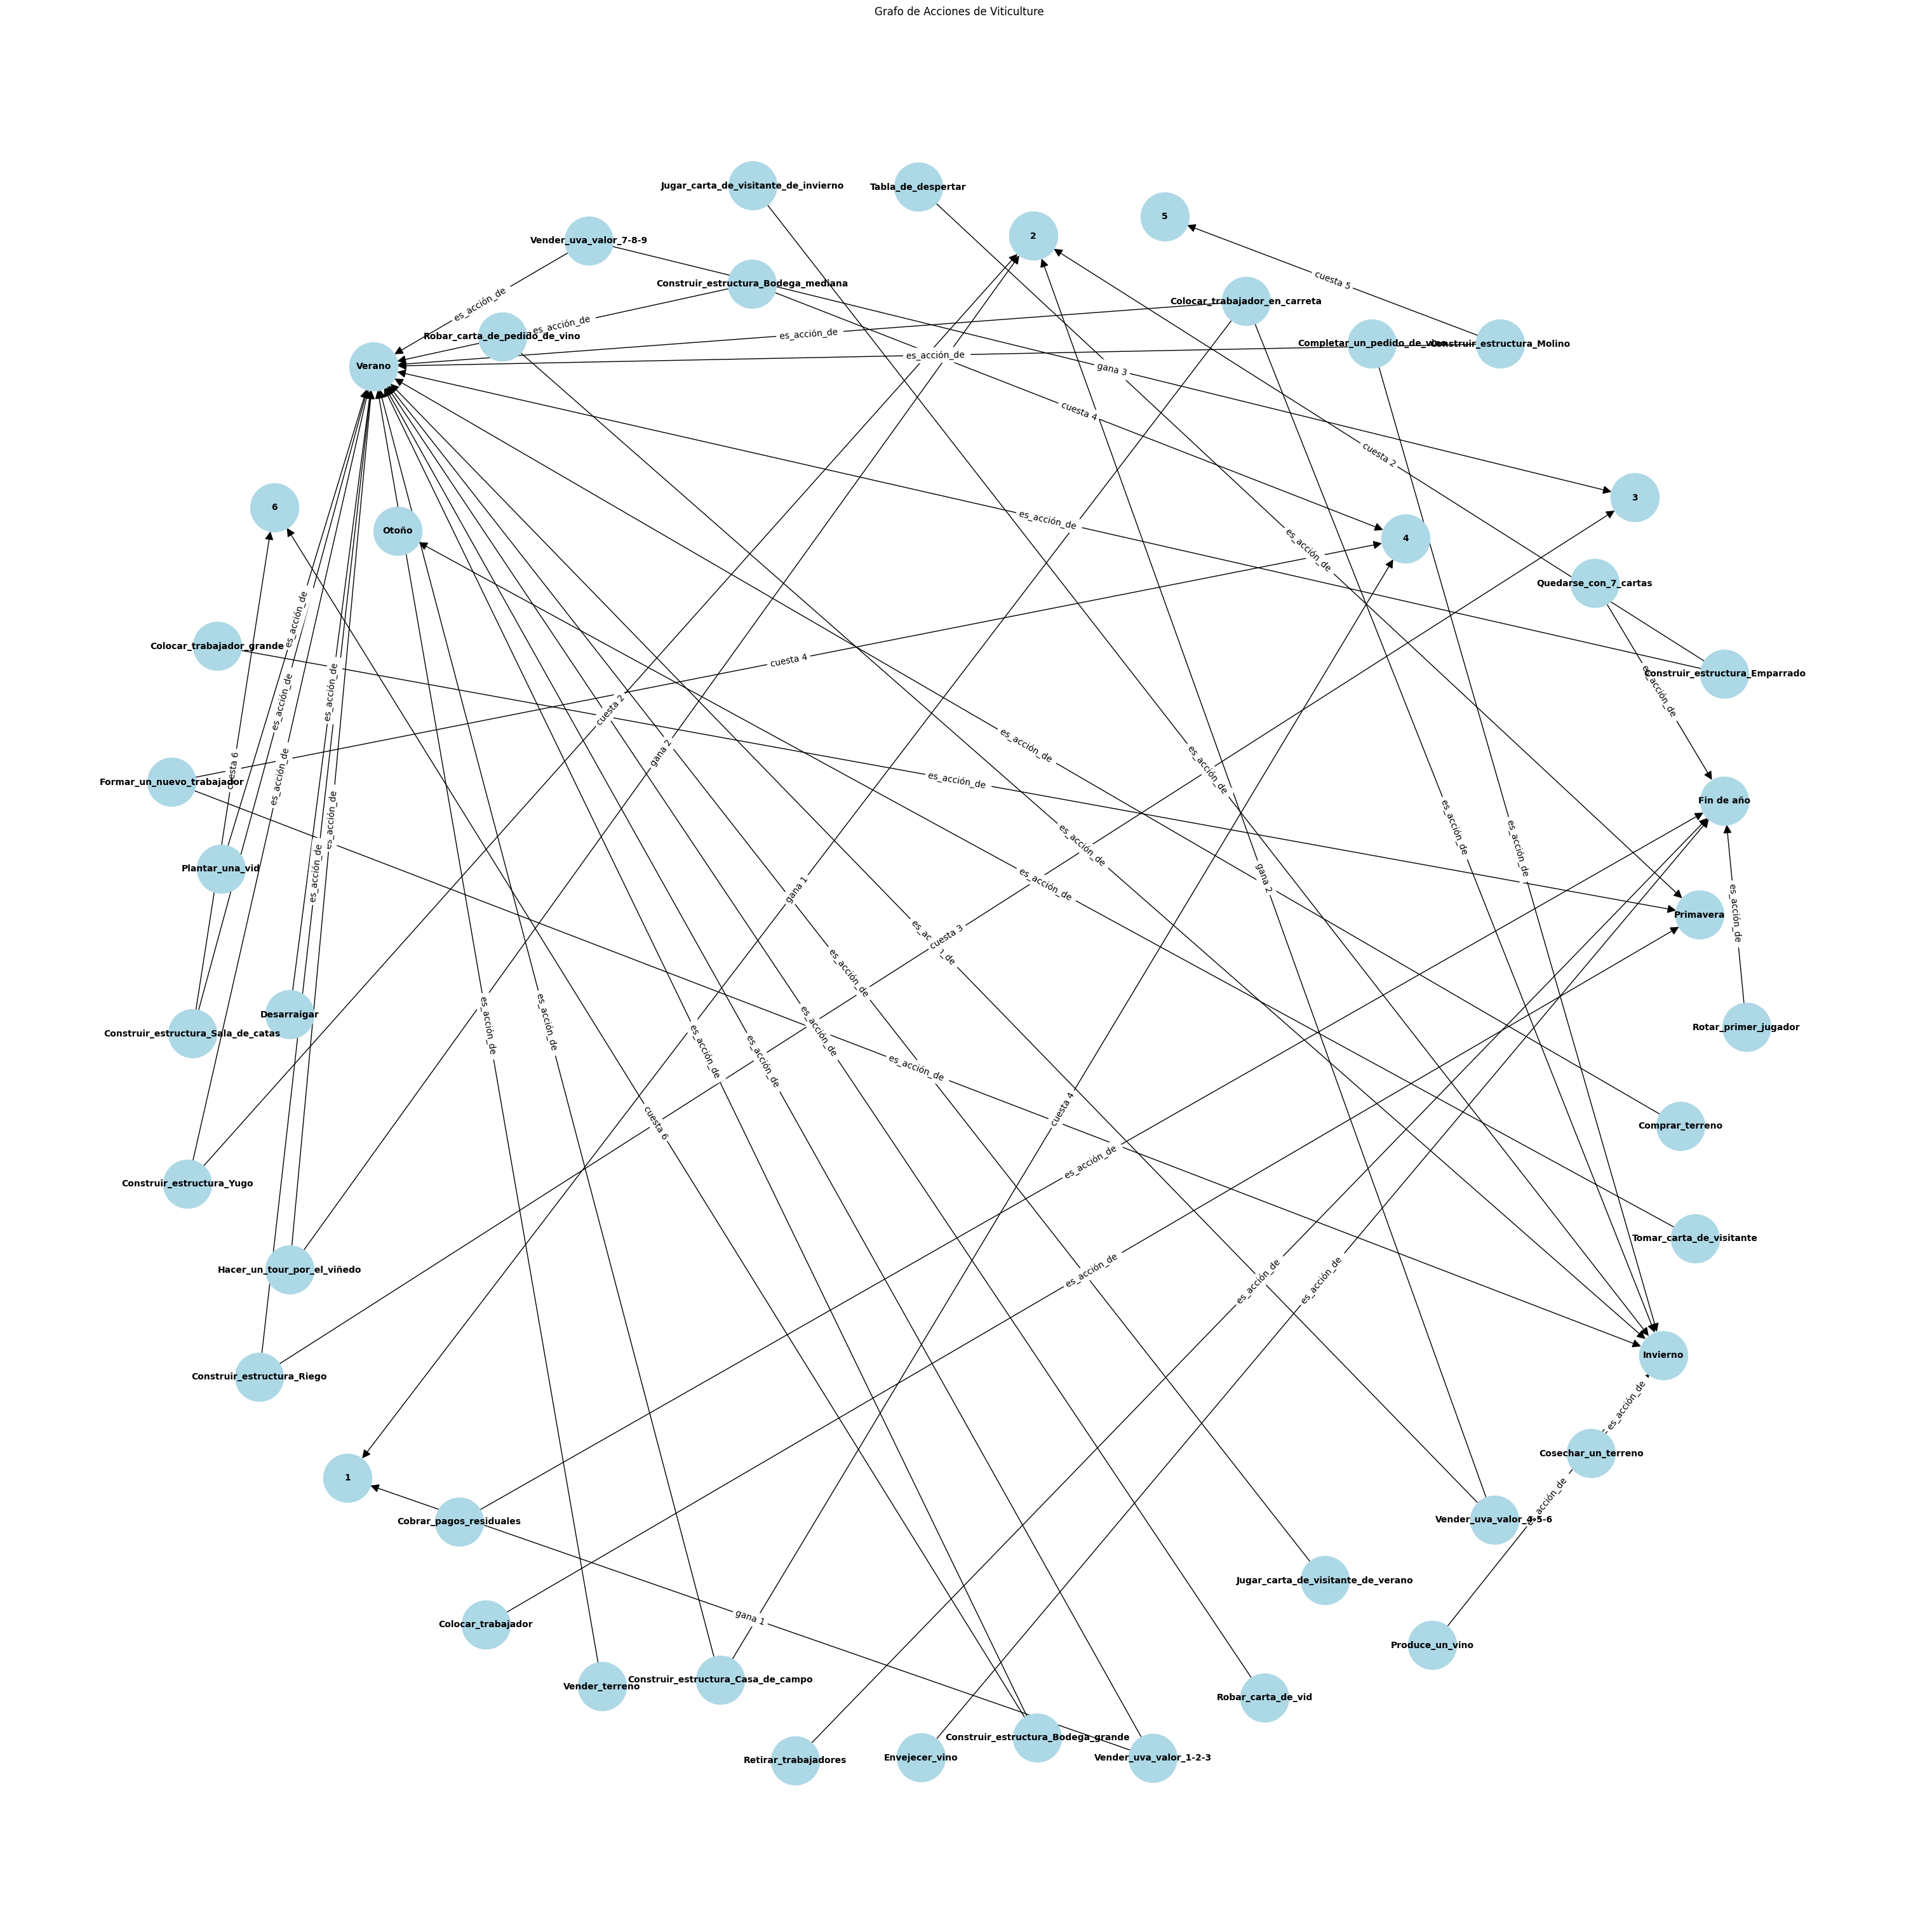

In [10]:
import matplotlib.pyplot as plt

# Visualización del grafo
plt.figure(figsize=(30, 30))

# Dibujar el grafo
pos = nx.spring_layout(G, seed=42, k=10)  # Para obtener una disposición más agradable
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)

# Dibujar las etiquetas de las relaciones
edge_labels = {}
for u, v, data in G.edges(data=True):
    if 'relation' in data and 'value' in data:
        edge_labels[(u, v)] = f"{data['relation']} {data['value']}"

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Mostrar el grafo
plt.title("Grafo de Acciones de Viticulture")
plt.axis("off")
plt.show()

In [11]:
import json

# Convierto el grafo a un diccionario para guardarlo
grafo_dict = nx.node_link_data(G)

# Guardar el grafo en un archivo JSON
with open(path_files+'Acciones.json', 'w') as f:
    json.dump(grafo_dict, f, indent=4)
print("Grafo generado y guardado en 'Acciones.json'.")

Grafo generado y guardado en 'Acciones.json'.


In [12]:
from rdflib import Graph, Literal, RDF, Namespace, URIRef
# Guardar el grafo en un archivo RDF
# Crear un grafo RDF
g = Graph()

# Definir un espacio de nombres para tus recursos
n = Namespace("http://example.org/")

# Añadir nodos y relaciones al grafo RDF
for edge in G.edges():
    subject_name, object_name = edge
    relation_name = edge_labels[edge]

    # Reemplazo espacios con guiones bajos en el nombre de la relación
    relation_name = relation_name.replace(" ", "_")

    subject = URIRef(n + subject_name)
    predicate = URIRef(n + relation_name)
    obj = URIRef(n + str(object_name))

    g.add((subject, predicate, obj))

# Serializar y exportar el grafo a RDF/XML
rdf_output = g.serialize(format='xml')
print(rdf_output)

# Guardar el RDF en un archivo
with open(path_files+"Acciones.rdf", "w") as file:
    file.write(rdf_output)
print("Grafo generado y guardado en 'Acciones.rdf'.")

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:ns1="http://example.org/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://example.org/Cosechar_un_terreno">
    <ns1:es_acción_de_ rdf:resource="http://example.org/Invierno"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/Tomar_carta_de_visitante">
    <ns1:es_acción_de_ rdf:resource="http://example.org/Otoño"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/Formar_un_nuevo_trabajador">
    <ns1:es_acción_de_ rdf:resource="http://example.org/Invierno"/>
    <ns1:cuesta_4 rdf:resource="http://example.org/4"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/Retirar_trabajadores">
    <ns1:es_acción_de_ rdf:resource="http://example.org/Fin de año"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/Vender_uva_valor_1-2-3">
    <ns1:es_acción_de_ rdf:resource="http://example.org/Verano"/>
    <ns1

# Órdenes de vinos

Desde el foro de BGG descargué una tabla en xlsx donde se encuentra el detalle de todas las cartas de órdenes de vinos, necesarias para sumar puntos y aumentar el pago residual.

Genero un grafo con las relaciones entre los vinos pedidos en cada orden y los beneficios de cada una.

In [13]:
import networkx as nx

# Crear un grafo dirigido
G = nx.DiGraph()

# Datos de ordenes de vinos y sus beneficios
# ID Carta, Vino tinto, Vino blanco, Vino rosado, Vino espumante, PV, Liras
ordenes_vinos = [
    (1,5,0,0,0,2,1),
    (2,0,5,0,0,2,1),
    (3,3,1,0,0,2,1),
    (4,1,3,0,0,2,1),
    (5,2,2,0,0,2,1),
    (6,0,0,4,0,2,1),
    (7,3,3,0,0,3,1),
    (8,4,0,0,0,3,1),
    (9,3,0,0,0,3,1),
    (10,0,4,0,0,3,1),
    (11,0,3,0,0,3,1),
    (12,4,2,0,0,3,1),
    (13,2,4,0,0,3,1),
    (14,6,0,0,0,3,1),
    (15,0,6,0,0,3,1),
    (16,0,0,6,0,3,1),
    (17,4,0,0,0,4,1),
    (18,3,0,0,0,4,1),
    (19,2,0,0,0,4,1),
    (20,0,4,0,0,4,1),
    (21,0,3,0,0,4,1),
    (22,0,2,0,0,4,1),
    (23,5,3,0,0,4,1),
    (24,3,5,0,0,4,1),
    (25,8,0,0,0,4,1),
    (26,0,8,0,0,4,1),
    (27,4,0,4,0,4,1),
    (28,0,4,4,0,4,1),
    (29,0,0,8,0,4,1),
    (30,0,0,0,7,4,1),
    (31,7,0,0,0,5,2),
    (32,6,0,0,0,5,2),
    (33,0,7,0,0,5,2),
    (34,0,6,0,0,5,2),
    (35,6,6,0,0,5,2),
    (36,2,2,5,0,5,2),
    (37,3,0,7,0,5,2),
    (38,0,3,0,7,5,2),
    (39,0,0,0,9,5,2),
    (40,0,0,6,0,6,2),
    (41,0,0,5,0,6,2),
    (42,0,3,0,7,6,2),
    (43,0,4,0,7,6,2),
    (44,0,2,0,8,6,2),
    (45,0,3,0,8,6,2)]

In [14]:
# Agregar los nodos y las aristas al grafo
for ID, tinto, blanco, rosado, espumante, pv, liras in ordenes_vinos:
    cartaid="Carta_"+str(ID)
    G.add_node(cartaid)

    if tinto > 0:
      G.add_edge(cartaid, "Tinto", relation="vino_tinto", value=tinto)

    if blanco > 0:
      G.add_edge(cartaid, "Blanco", relation="vino_blanco", value=blanco)

    if rosado > 0:
      G.add_edge(cartaid, "Rosado", relation="vino_rosado", value=rosado)

    if espumante > 0:
      G.add_edge(cartaid, "Espumante", relation="vino_espumante", value=espumante)

    if pv > 0:
      G.add_edge(cartaid, pv, relation="Gana_PV", value=pv)

    if liras > 0:
      G.add_edge(cartaid, liras, relation="Gana_liras", value=liras)

In [15]:
import matplotlib.pyplot as plt

# Visualización del grafo
plt.figure(figsize=(30, 30))

# Dibujar el grafo
pos = nx.spring_layout(G, seed=42, k=10)  # Para obtener una disposición más agradable
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)

# Dibujar las etiquetas de las relaciones
edge_labels = {}
for u, v, data in G.edges(data=True):
    if 'relation' in data and 'value' in data:
        edge_labels[(u, v)] = f"{data['relation']} {data['value']}"

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Mostrar el grafo
plt.title("Grafo de Órdenes de vinos")
plt.axis("off")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [16]:
import json

# Convierto el grafo a un diccionario para guardarlo
grafo_dict = nx.node_link_data(G)

# Guardar el grafo en un archivo JSON
with open(path_files+'Ordenes.json', 'w') as f:
    json.dump(grafo_dict, f, indent=4)
print("Grafo generado y guardado en 'Ordenes.json'.")

Grafo generado y guardado en 'Ordenes.json'.


In [17]:
from rdflib import Graph, Literal, RDF, Namespace, URIRef
# Guardar el grafo en un archivo RDF
# Crear un grafo RDF
g = Graph()

# Definir un espacio de nombres para tus recursos
n = Namespace("http://example.org/")

# Añadir nodos y relaciones al grafo RDF
for edge in G.edges():
    subject_name, object_name = edge
    relation_name = edge_labels[edge]

    # Reemplazo espacios con guiones bajos en el nombre de la relación
    relation_name = relation_name.replace(" ", "_")

    subject = URIRef(n + subject_name)
    predicate = URIRef(n + relation_name)
    obj = URIRef(n + str(object_name))

    g.add((subject, predicate, obj))

# Serializar y exportar el grafo a RDF/XML
rdf_output = g.serialize(format='xml')
print(rdf_output)

# Guardar el RDF en un archivo
with open(path_files+"Ordenes.rdf", "w") as file:
    file.write(rdf_output)
print("Grafo generado y guardado en 'Ordenes.rdf'.")

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:ns1="http://example.org/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://example.org/Carta_28">
    <ns1:vino_blanco_4 rdf:resource="http://example.org/Blanco"/>
    <ns1:vino_rosado_4 rdf:resource="http://example.org/Rosado"/>
    <ns1:Gana_PV_4 rdf:resource="http://example.org/4"/>
    <ns1:Gana_liras_1 rdf:resource="http://example.org/1"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/Carta_21">
    <ns1:vino_blanco_3 rdf:resource="http://example.org/Blanco"/>
    <ns1:Gana_PV_4 rdf:resource="http://example.org/4"/>
    <ns1:Gana_liras_1 rdf:resource="http://example.org/1"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/Carta_24">
    <ns1:vino_tinto_3 rdf:resource="http://example.org/Tinto"/>
    <ns1:vino_blanco_5 rdf:resource="http://example.org/Blanco"/>
    <ns1:Gana_PV_4 rdf:resource="http://example.org/4"/>
    <ns1:Gana_l

# Guía rápida

Además de los grafos generados a mano, genero uno a partir de una guía rápida utilizando las herramientas de la Unidad 5 sobre Ontología a partir de texto.

In [18]:
!pip install spacy networkx
!python -m spacy download es_core_news_md
!pip install Unidecode
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 26.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [19]:
# Función para limpieza de texto
from unidecode import unidecode
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Obtener las stopwords en español
stop_words = set(stopwords.words('spanish'))

def clean_text(text):
  # Texto en minúsculas
  text = text.lower()

  # Elimino tildes
  text = unidecode(text)

  # Elimino stopwords
  palabras = text.split()
  text_sw = [palabra for palabra in palabras if palabra.lower() not in stop_words]
  text = ' '.join(text_sw)

  # Elimino caracteres especiales
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

  # Elimino los saltos de línea (\n)
  texto_limpio = text.replace("\n", " ")

  return texto_limpio

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
import re

# Abro el archivo Viriculture_QuickGuide_ES.txt
with open("/content/drive/MyDrive/TUIA/Procesamiento lenguaje Natural/TP2/Text/Viriculture_QuickGuide_ES.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Dividir el texto en oraciones utilizando un separador como el punto (.) o cualquier otro delimitador
sentences = re.split(r'(?<=[.!?]) +', text)

# Limpieza de texto en oraciones
sentences = [clean_text(sentence) for sentence in sentences]

# Mostrar las oraciones
print(sentences)

['resumen turno verano invierno orden turnotabla despertador cada jugador puede colocar trabajador espacio accion estacion actual', 'solo pueden elegir acciones puedan realizar', 'cada trabajador use solo recuperara finalizar ano', 'jugador puede pasar si hace podra tomar mas acciones estacion indicarlo mueve ficha gallo jugadora derecha verano izquierda invierno', 'continua jugando orden turno jugadores pasado luego avancen siguiente estacion espacios accion  partidas 2 jugadores solo usa espacio accion izquierda', '34 jugadores utiliza tambien espacio mitad espacio bonificacion', '56 jugadores usa tres espacios espacios disponibles pueden usar cualquier orden usar espacios bonificacion  puedes recibir bonificacion despues accion principal o usarla variant amistosa  solo puedes usar espacio bonificacion si capacidad completar accion recibir bonificacion omite regla si demas espacios accion esten ocupados guia constr uccion trellis emparrado   2  puedes cultivar vides requisito irrigat

In [21]:
import spacy
from spacy import displacy
from IPython.core.display import display, HTML

nlp = spacy.load("es_core_news_md")

for sentence in sentences:
    doc = nlp(sentence)

    # Visualizar token.pos_ y token.dep_
    display(HTML(f"<strong>Frase:</strong> {sentence}"))
    displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


('resumen', 'espacio') ['colocar']
('acciones', '') ['elegir']
('trabajador', '') ['use']
('jugador', 'gallo') ['pasar']
('jugadores', 'izquierda') ['continua']
('jugadores', 'bonificacion') ['utiliza']
('guia', 'vid') ['usa']
('pvano', 'recorrido') ['recibe']
('max', 'otono') ['recibe']
('acciones', 'tiempo') ['tomalas']
('vinos', 'vinos') ['permite']
('', 'trabajadores') ['requisito']
('valor', 'ficha') ['actuar']
('espacio', 'terreno') ['vino']
('vides', 'uvas') ['rojasdevalua']
('cosechar', 'tipo') ['dara']
('fichas', 'reglas') ['permanecen']
('', 'bodega') ['tener']
('', 'tinto') ['devalua']
('', 'bodega') ['mueve']
('crear', 'rosado') ['sumes']
('', 'uvas') ['coloca']
('crear', 'espumoso') ['suma']
('one', 'valor') ['coloca']
('parte', 'monto') ['recibe']
('Lprepara', '') ['tomes']
('jugador', 'color') ['toma']
('jugador', 'pagos') ['coloca']
('jugadores', 'trabajadores') ['toman']
('', 'vid') ['entrega']
('baraja', 'espacios') ['5']
('jugador', 'azar') ['carta']
('', 'invierno')

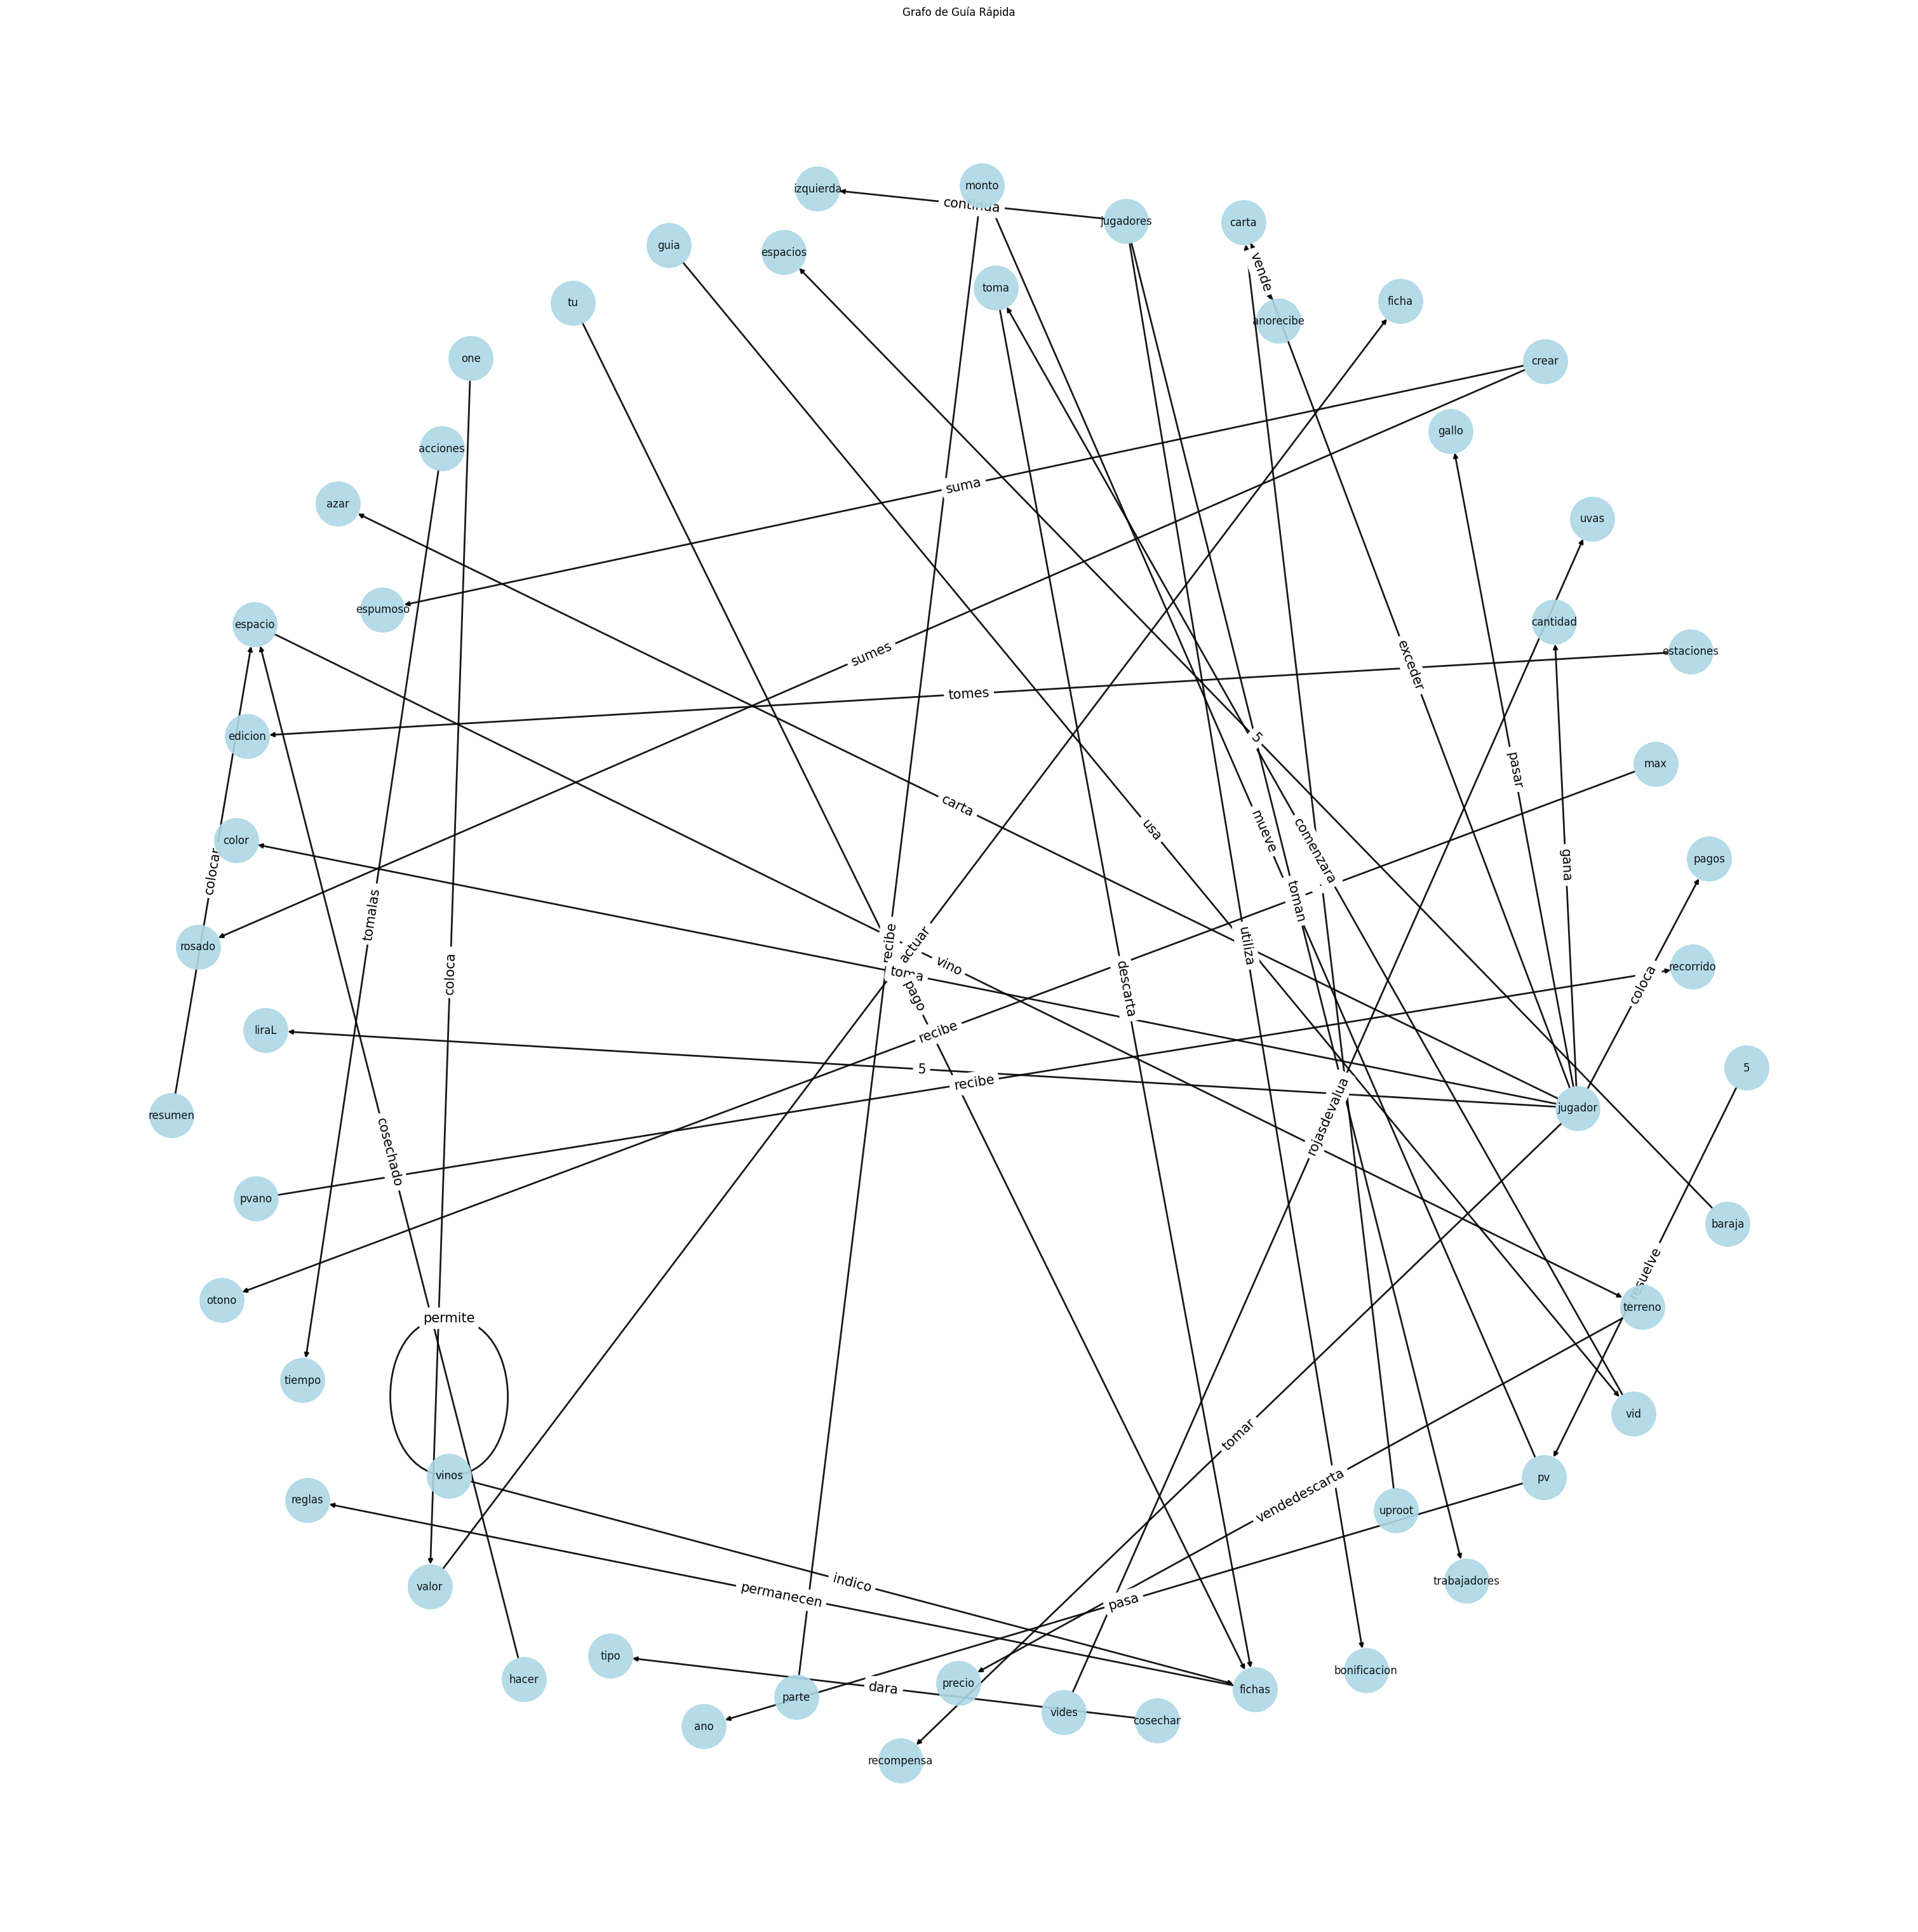

In [22]:
# Importar las bibliotecas necesarias
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Cargar el modelo en español para tokenización, etiquetado POS, análisis y NER
nlp = spacy.load("es_core_news_md")

# Función para extraer entidades y relaciones de un documento
def extract_entities_relations(doc):
    subject = ""
    obj = ""
    relation = ""
    prep_obj = ""  # Objeto de una preposición

    for token in doc:
        # Detectar el sujeto
        if "subj" in token.dep_:
            subject = token.text
        # Detectar el objeto directo
        if "obj" in token.dep_:
            obj = token.text
        # Detectar el ROOT o relación principal
        if token.dep_ == "ROOT":
            relation = token.text
            # Buscar hijos del ROOT que sean modificadores nominales (nmod)
            for child in token.children:
                if child.dep_ == "nmod":
                    prep_obj = child.text
        # Detectar preposiciones y su objeto
        if token.dep_ == "prep":
            for child in token.children:
                prep_obj = child.text

    # Si hay un objeto de preposición, usarlo como el objeto principal
    if prep_obj:
        obj = prep_obj

    return (subject, obj), [relation]

# Crear un grafo dirigido
G = nx.DiGraph()

# Diccionario para almacenar las etiquetas de las aristas (relaciones)
edge_labels = {}

# Procesar cada frase, extraer entidades y relaciones, y añadir al grafo
for sentence in sentences:
    doc = nlp(sentence)
    entities, relations = extract_entities_relations(doc)
    print(entities, relations)
    if entities[0] and entities[1] and relations:
        G.add_edge(entities[0], entities[1])
        edge_labels[(entities[0], entities[1])] = relations[0]

# Dibujar el grafo
# Definir un tamaño de figura
plt.figure(figsize=(30, 30))

# Aumentar el espacio entre nodos
pos = nx.spring_layout(G, k=3)

nx.draw(G, pos, edge_color='black', width=2.0, linewidths=1,
        node_size=2500, node_color='lightblue', alpha=0.9,
        labels={node: node for node in G.nodes()})
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=15)
plt.title('Grafo de Guía Rápida')
plt.axis('off')
plt.show()

In [23]:
import json

# Convierto el grafo a un diccionario para guardarlo
grafo_dict = nx.node_link_data(G)

# Guardar el grafo en un archivo JSON
with open(path_files+'Guia_Rapida.json', 'w') as f:
    json.dump(grafo_dict, f, indent=4)
print("Grafo generado y guardado en 'Guia_Rapida.json'.")

Grafo generado y guardado en 'Guia_Rapida.json'.


/usr/local/lib/python3.10/dist-packages/networkx/readwrite/json_graph/node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


In [24]:
G.edges()

OutEdgeView([('resumen', 'espacio'), ('espacio', 'terreno'), ('jugador', 'gallo'), ('jugador', 'color'), ('jugador', 'pagos'), ('jugador', 'azar'), ('jugador', 'liraL'), ('jugador', 'cantidad'), ('jugador', 'recompensa'), ('jugador', 'carta'), ('jugadores', 'izquierda'), ('jugadores', 'bonificacion'), ('jugadores', 'trabajadores'), ('guia', 'vid'), ('vid', 'toma'), ('pvano', 'recorrido'), ('max', 'otono'), ('acciones', 'tiempo'), ('vinos', 'vinos'), ('vinos', 'fichas'), ('valor', 'ficha'), ('terreno', 'precio'), ('vides', 'uvas'), ('cosechar', 'tipo'), ('fichas', 'reglas'), ('crear', 'rosado'), ('crear', 'espumoso'), ('one', 'valor'), ('parte', 'monto'), ('baraja', 'espacios'), ('uproot', 'carta'), ('carta', 'anorecibe'), ('tu', 'fichas'), ('pv', 'ano'), ('pv', 'monto'), ('5', 'pv'), ('toma', 'fichas'), ('hacer', 'espacio'), ('estaciones', 'edicion')])

In [25]:
from rdflib import Graph, Literal, RDF, Namespace, URIRef
# Guardar el grafo en un archivo RDF
# Crear un grafo RDF
g = Graph()

# Definir un espacio de nombres para tus recursos
n = Namespace("http://example.org/")

# Añadir nodos y relaciones al grafo RDF
for edge in G.edges():
    subject_name, object_name = edge
    relation_name = edge_labels[edge]

    # Corrección por falla en exportación a XML
    if str(subject_name)=="5":
      subject_name = "cinco"
    if str(object_name)=="5":
      object_name = "cinco"
    if str(relation_name)=="5":
      relation_name = "cinco"

    # Reemplazo espacios con guiones bajos en el nombre de la relación
    relation_name = relation_name.replace(" ", "_")

    subject = URIRef(n + str(subject_name))
    predicate = URIRef(n + str(relation_name))
    obj = URIRef(n + str(object_name))

    g.add((subject, predicate, obj))

# Serializar y exportar el grafo a RDF/XML
rdf_output = g.serialize(format='xml')
print(rdf_output)

# Guardar el RDF en un archivo
with open(path_files+"Guia_Rapida.rdf", "w") as file:
    file.write(rdf_output)
print("Grafo generado y guardado en 'Guia_Rapida.rdf'.")

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:ns1="http://example.org/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://example.org/jugador">
    <ns1:pasar rdf:resource="http://example.org/gallo"/>
    <ns1:toma rdf:resource="http://example.org/color"/>
    <ns1:coloca rdf:resource="http://example.org/pagos"/>
    <ns1:carta rdf:resource="http://example.org/azar"/>
    <ns1:cinco rdf:resource="http://example.org/liraL"/>
    <ns1:gana rdf:resource="http://example.org/cantidad"/>
    <ns1:tomar rdf:resource="http://example.org/recompensa"/>
    <ns1:exceder rdf:resource="http://example.org/carta"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/crear">
    <ns1:sumes rdf:resource="http://example.org/rosado"/>
    <ns1:suma rdf:resource="http://example.org/espumoso"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/max">
    <ns1:recibe rdf:resource="http://example.org/otono"/>
  </